In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig

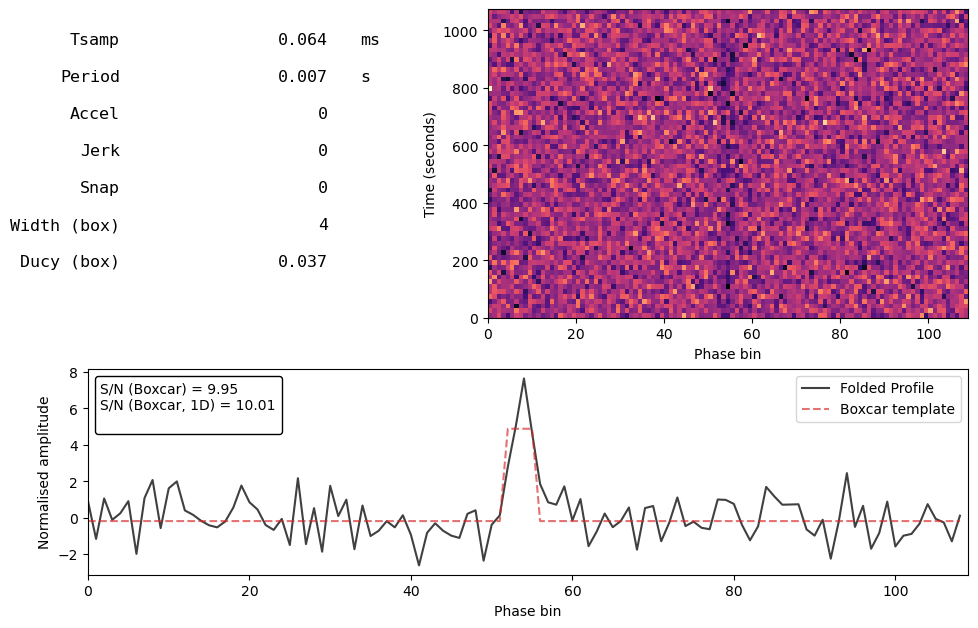

In [2]:
pulsar_period = 0.007  # (s)
dt = 64e-6
nsamps = 2**24
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, snr=10, ducy=0.05, nsamps=nsamps)
tim_data = cfg.generate(shape="gaussian")
fig = tim_data.plot_fold(cfg.freq, cfg.fold_bins)
plt.show()

In [3]:
eta = 1
nbins = 64
param_limits = [(1 / 0.0075, 1 / 0.0065)]
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=param_limits,
    bseg_brute=bseg_brute,
    ducy_max=0.5,
    wtsp=1.5,
    nthreads=8,
    use_fourier=False,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-02-18 18:31:04.107] [info] P-FFA [16384, 86, 2, 64] -> [1, 1409630, 2, 64]
[2026-02-18 18:31:04.107] [info] FFA Memory Usage: 1.34 GB + 0.02 GB (coords)


In [4]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq}))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654470), np.int64(3))
Best S/N: 8.69
Best Period: 0.007000000381987604
Best freq: 142.8571350614779
Best width: 4


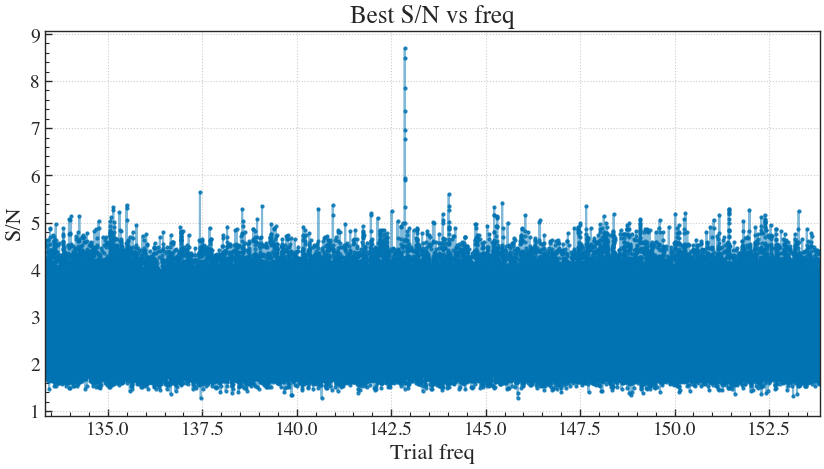

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

### FFT-SHIFT Search

In [6]:
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=param_limits,
    bseg_brute=bseg_brute,
    ducy_max=0.5,
    wtsp=1.5,
    nthreads=8,
    use_fourier=True,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-02-18 18:31:05.264] [info] P-FFA [16384, 86, 2, 33] -> [1, 1409630, 2, 33]
[2026-02-18 18:31:05.264] [info] FFA Memory Usage: 1.39 GB + 0.02 GB (coords)


In [7]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq}))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654470), np.int64(2))
Best S/N: 9.57
Best Period: 0.007000000381987604
Best freq: 142.8571350614779
Best width: 3


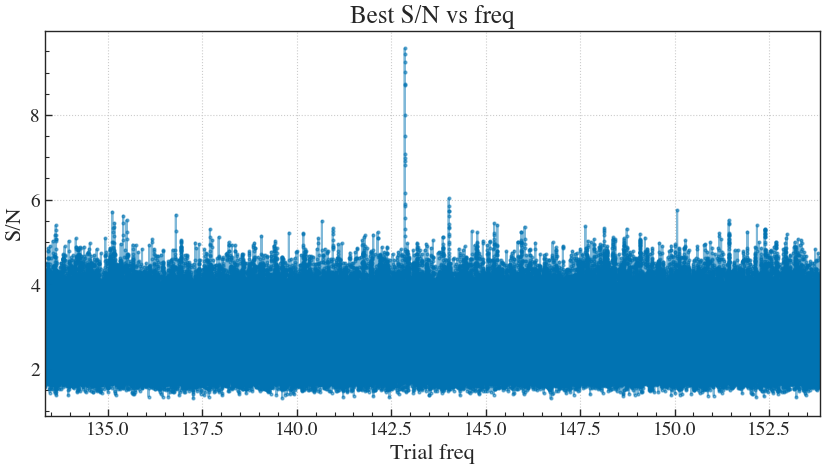

In [8]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()